# Loading the data from the initial and final snapshot

In [3]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"

datapath="./fire2_data_pkl/" #this is teh path where the data of our tracked clusters is

plot_path="./plots/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

data_start=596
data_end=690



fn_clusters_initial="all_clusters_at_snapshot_"+str(data_start)+".pkl" 
fn_clusters_later="all_clusters_at_snapshot_"+str(data_end)+".pkl" 

with open(datapath+fn_clusters_initial, "rb") as input:
    initial_data= pickle.load(input)

with open(datapath+fn_clusters_later, "rb") as input:
    later_data= pickle.load(input)

#print("########################## TEST: This is cluster data from second cluster",cluster_data[1])
print("####################### Total clusters present is",len(initial_data))
print("\n############## Keys to access the data: \n",initial_data[1].keys())


#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

####################### Total clusters present is 17

############## Keys to access the data: 
 dict_keys(['ind_tracked', 'age_tracked', 'x_tracked', 'y_tracked', 'z_tracked', 'vx_tracked', 'vy_tracked', 'vz_tracked', 'mass_tracked', 'xcm', 'ycm', 'zcm', 'delta_rxyz', 'rmax', 'ymax', 'ymin', 'xmax', 'xmin', 'avg_delta_rxyz', 'vR_cyl_tracked', 'vphi_cyl_tracked', 'vz_cyl_tracked'])


In [5]:
later_data[2]["xmin"]

-5.19789643247823

# Fitting Ellipse using the EllipseModel from Scipy

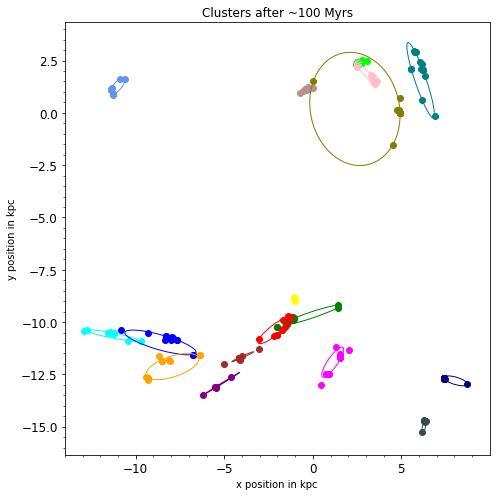

In [2]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
total_clusters=len(later_data)
fig11 = plt.figure(figsize=(7,7))
#fig1.suptitle("Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
cluster_count=0
#plot_count=0
ax = fig11.add_subplot(1,1,1)

for i in range(total_clusters):

    x=later_data[cluster_count+1]["x_tracked"]
    y=later_data[cluster_count+1]["y_tracked"]
    xcm=later_data[cluster_count+1]["xcm"]
    ycm=later_data[cluster_count+1]["ycm"]
    rmax=later_data[cluster_count+1]["rmax"]
    z=later_data[cluster_count+1]["z_tracked"]
    
    s1=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=colors[cluster_count])
    #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    ax.minorticks_on()
    ax.set_xlabel("x position in kpc")
    ax.set_ylabel("y position in kpc")
    ax.set_title("Clusters after ~100 Myrs")
    
    xy=zip(x,y)
    xy_array=np.array(tuple(xy))
    
    ####
    '''
    xc=xcm
    yc=ycm
    theta=3.1415
    a=1.1
    b=2.1
    ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
    ax.add_patch(ell_patch)
    '''
    ####
    
    ell = EllipseModel()
    e=ell.estimate(xy_array)
    if(e==True):
        xc, yc, a, b, theta = ell.params
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
    '''
    elif(e==False):
        print("Failed")
        dists=((xcm-x)**2+(ycm-y)**2)**(1/2) #dists is an array that stores distance from cm to each point serially
        dists_max=np.max(dists) #finding the maximum value of distance in the dist array
        dists_min=np.min(dists) #finding the minimum value of distance in the dist array
    
        max_location=np.where(dists==dists_max) #finding the location in the dists array where the max distance is at to find the point
        min_location=np.where(dists==dists_min) #finding the location of min distance to find the point where the min distance is

        max_point_x=x[max_location] #extracting is the x and y position of the max point Note: it is still an array
        max_point_y=y[max_location]
    
        min_point_x=x[min_location] #extracting is the x and y position of the min point Note: it is still an array
        min_point_y=y[min_location]
    
        angle=(max_point_y[0]-min_point_y[0])/(max_point_x[0]-min_point_x[0]) #slope of the line joining max and min points

        slope=np.arctan(angle)
        xc=xcm
        yc=ycm
        theta=slope
        a=rmax
        b=rmax/3
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
    '''
    
    cluster_count+=1 
    
    
#ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
    
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")
fig11.savefig("ellipse.png")
plt.tight_layout()
plt.show()

# My Method



Slope of the line joining the point furthest and closed to the Center of Mass has been considered as the angle of the Ellipse

a=rmax
b=rmax/3

# Trying my method for the last snapshot

b>a in cluster_group cyan
0.12497703998006246 1.4428993390890965
b>a in cluster_group blue
0.3624927997282029 2.063242885963069
b>a in cluster_group green
0.15008533412974234 1.6527543735477987
b>a in cluster_group magenta
0.2635464850307467 0.910624380086077
b>a in cluster_group yellow
0.028099457859674038 0.06581782574354286
b>a in cluster_group teal
0.3107692302636501 1.930696217422522
b>a in cluster_group red
0.25610201598382343 1.0645005916446852
b>a in cluster_group orange
0.4974640796728772 1.5416118256548836
b>a in cluster_group olive
2.4615711620681435 2.7871014366667337


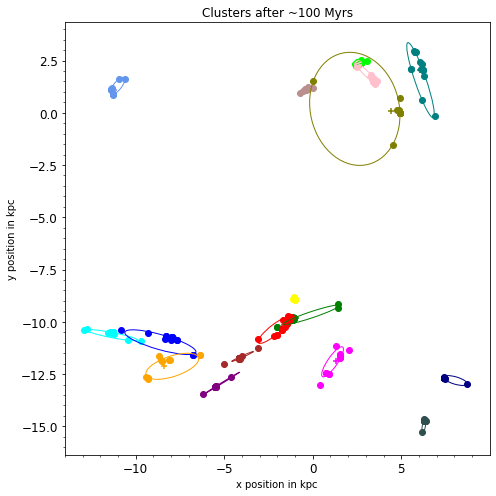

In [5]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
total_clusters=len(later_data)
fig11 = plt.figure(figsize=(7,7))
#fig1.suptitle("Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
cluster_count=0
#plot_count=0
ax = fig11.add_subplot(1,1,1)

for i in range(total_clusters):

    x=later_data[cluster_count+1]["x_tracked"]
    y=later_data[cluster_count+1]["y_tracked"]
    z=later_data[cluster_count+1]["z_tracked"]
    
    xcm=later_data[cluster_count+1]["xcm"]
    ycm=later_data[cluster_count+1]["ycm"]
    rmax=later_data[cluster_count+1]["rmax"]
    
    dists=((xcm-x)**2+(ycm-y)**2)**(1/2) #dists is an array that stores distance from cm to each point serially
    dists_max=np.max(dists) #finding the maximum value of distance in the dist array
    dists_min=np.min(dists) #finding the minimum value of distance in the dist array
    
    max_location=np.where(dists==dists_max) #finding the location in the dists array where the max distance is at to find the point
    min_location=np.where(dists==dists_min) #finding the location of min distance to find the point where the min distance is

    max_point_x=x[max_location] #extracting is the x and y position of the max point Note: it is still an array
    max_point_y=y[max_location]
    
    min_point_x=x[min_location] #extracting is the x and y position of the min point Note: it is still an array
    min_point_y=y[min_location]
    
    angle=(max_point_y[0]-min_point_y[0])/(max_point_x[0]-min_point_x[0]) #slope of the line joining max and min points

    slope=np.arctan(angle)
    ax.scatter(xcm,ycm,marker="+",c=colors[cluster_count])
    s1=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=colors[cluster_count])
    #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    ax.minorticks_on()
    ax.set_xlabel("x position in kpc")
    ax.set_ylabel("y position in kpc")
    ax.set_title("Clusters after ~100 Myrs")
    
    xy=zip(x,y)
    xy_array=np.array(tuple(xy))
    
    ####
    
    
    
    ####

    ell = EllipseModel()
    e=ell.estimate(xy_array)
    if(e==True):
        xc, yc, a, b, theta = ell.params
        if(b>a):
            print("b>a in cluster_group",colors[cluster_count])
            print(a,b)
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
    
    elif(e==False):
        print("Failed")
        xc=xcm
        yc=ycm
        theta=slope
        a=rmax
        b=rmax/3
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
    
    cluster_count+=1 
    
    
#ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
    
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")
fig11.savefig("mymodel_ellipse.png")
plt.tight_layout()
plt.show()

# Creating a GIF with those ellipses at each snapshot

In [6]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
snapshot_initial=596
snapshot_final=690

gif_path="./ellipse_images_gifs/" #creating a path to store the plots only if it does not exist
gas_datapath="./fire2_gas_data_pkl/"
if not os.path.exists(gif_path):
  os.makedirs(gif_path)

snapnumber=snapshot_initial

area={}

fig11=plt.figure()

for snaps in range(snapshot_final-snapshot_initial+1):
    area_snap=list()
    fn_clusters_later="all_clusters_at_snapshot_"+str(snapnumber)+".pkl" 
    with open(datapath+fn_clusters_later, "rb") as input:
        later_data= pickle.load(input)
    #print("Reading from the file: ",fn_clusters_later)
    total_clusters=len(later_data)
    cluster_count=0
    fig11.set_size_inches(7,7)
    ax=fig11.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height

    for i in range(total_clusters):

        x=later_data[cluster_count+1]["x_tracked"]
        y=later_data[cluster_count+1]["y_tracked"]
        z=later_data[cluster_count+1]["z_tracked"]

        xcm=later_data[cluster_count+1]["xcm"]
        ycm=later_data[cluster_count+1]["ycm"]
        rmax=later_data[cluster_count+1]["rmax"]

        dists=((xcm-x)**2+(ycm-y)**2)**(1/2) #dists is an array that stores distance from cm to each point serially
        dists_max=np.max(dists) #finding the maximum value of distance in the dist array
        dists_min=np.min(dists) #finding the minimum value of distance in the dist array

        max_location=np.where(dists==dists_max) #finding the location in the dists array where the max distance is at to find the point
        min_location=np.where(dists==dists_min) #finding the location of min distance to find the point where the min distance is

        max_point_x=x[max_location] #extracting is the x and y position of the max point Note: it is still an array
        max_point_y=y[max_location]

        min_point_x=x[min_location] #extracting is the x and y position of the min point Note: it is still an array
        min_point_y=y[min_location]

        angle=(max_point_y[0]-min_point_y[0])/(max_point_x[0]-min_point_x[0]) #slope of the line joining max and min points
        
        #x=x*-1
        #y=y*-1
        #xcm=xcm*-1
        #ycm=ycm*-1
        
        slope=np.arctan(angle)
        ax.scatter(xcm,ycm,marker="+",c=colors[cluster_count],alpha=0.7)
        s1=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=colors[cluster_count],s=7)
        #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
        ax.minorticks_on()
        ax.tick_params(labelsize=12)
        ax.set_xlabel("x (kpc)",fontsize=12,labelpad=3)
        ax.set_ylabel("y (kpc)",fontsize=12,labelpad=-5)
        #ax.set_title("Clusters after ~100 Myrs")
        #ax.set_xlim(-20,20)
        #ax.set_ylim(-20,20)
        xy=zip(x,y)
        xy_array=np.array(tuple(xy))

        ####

        ell = EllipseModel()
        e=ell.estimate(xy_array)
        if(e==True):
            #print("success")
            xc, yc, a, b, theta = ell.params
            ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
            ax.add_patch(ell_patch)
            #print(b,a)
            if (b>a):
                arr=a/b
            elif(b<a):
                arr=b/a
            #print(arr)
        
        elif(e==False):
            #print("Failed")
            xc=xcm
            yc=ycm
            theta=slope
            a=rmax
            b=rmax/3
            ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
            ax.add_patch(ell_patch)
            #arr=np.nan
            arr=b/a
           
        area_snap.append(arr)    
        cluster_count+=1 
        
    #ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
    #fig1.subplots_adjust(right=1.5)    
    #fig11.legend((s1), ("vphi_cyl"),"lower right")
    #fig11.suptitle("This is the title \n")
    
    ##################
    ##################
    #Loading the gas data
    file_name=simtype+"_gas_data"+str(snapnumber)+".pkl"
    #print("\nReading gas data from the file: ",file_name)
    with open(gas_datapath+file_name, "rb") as input:
      import_gasdata = pickle.load(input)
    
    #v=import_gasdata["v"]
    face=import_gasdata["face"]
    #xh=import_gasdata["xh"]
    #yh=import_gasdata["yh"]
    snaptime=import_gasdata["snaptime"]
    norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
    im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 
    

    #colorbar for the background gas density
    cmap_gray = matplotlib.cm.get_cmap('binary')
    norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
    cbar_ax1 = fig11.add_axes([0.04, 0.185, 0.04, 0.64]) # position of gray colorbar (left, bottom, width, height)
    cb1 = fig11.colorbar(im, cax=cbar_ax1, ticklocation='left')
    cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
    #plot a scale bar 5 kpc long
    ax.plot([-22.5,-17.5], [22.5,22.5], 'k-', linewidth=5)
    label1 = "5 kpc"
    ax.text(-22.5, 20, label1, fontsize=12.5)
    
    #label the name of the galaxy on plot 
    #label_simname="m12i mhdcv"
    #ax.text(10,-23.5,label_simname,fontsize=13.5)
    label2="m12i mhdcv "+simtype.upper() 
    ax.text(-23.5,-23.5,label2,fontsize=13.5) 
    
    #label the time from the snapshot_times.txt file
    label3 = 'time = ' + f'{snaptime:.3f}' + ' Gyr'
    ax.text(3.5,22,label3,fontsize=13.5) #display at the top right  
    #ax.text(-23.5,-21,label3,fontsize=13.5) #display time on the bottom left above simtype
    
    
    img_name=str(snapnumber)+"mymodel_ellipse.png"
    fig11.savefig(gif_path+img_name,bbox_inches='tight',dpi=200)
    #print("Generated the plot and saved the figure as: ",img_name,end="\r",flush=True)
    plt.tight_layout()
    fig11.clf()
    plt.close()
    area.update({snapnumber:np.array(area_snap)})
    area_snap=None
    
    snapnumber+=1
   
    
print("The last image that was Saved is: ",img_name)

with open(datapath+"ellipse_data.pkl", 'wb') as output:
  pickle.dump(area, output) 

/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


The last image that was Saved is:  690mymodel_ellipse.png


In [7]:
print((area[610]))

[0.19629396 0.6694153  0.32925378 0.60315501 0.28764114 0.70853825
 0.72527733 0.49059309 0.56224352 0.63737237 0.17456488 0.35290134
 0.30724785 0.49127575 0.33333333 0.42471978 0.63978097]


# Creating the gif

In [56]:
from PIL import Image
#import glob  #use it if you want to read all certain file type
    
imgs=[]
for i in range(596,690): #startig and ending value+1 of the index that identifies different file names or imgs = glob.glob("*.png") can do done as well
    filename=str(i)+"mymodel_ellipse.png"
    if (i!=629):
        imgs.append(gif_path+filename)
    print("Scanned image from the File: ",filename,end="\r",flush=True)    

frames = []
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
# Save into a GIF file that loops forever
gifname="ellipses.gif"
frames[0].save(gif_path+gifname, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=200, loop=0)    #duration =200 looked good
print("\nSaved the GIF into the File: ",gifname)

Scanned image from the File:  689mymodel_ellipse.png
Saved the GIF into the File:  ellipses.gif


# Checking the ellipse properties

[0.08661522 0.1756908  0.09080922 0.28941295 0.42692777 0.16096226
 0.05856897 0.31811669 0.2357781  0.24058419 0.32269088 0.02083107
 0.21077629 0.1714408  0.26265509 0.88320114 0.38295573]
1
2
3


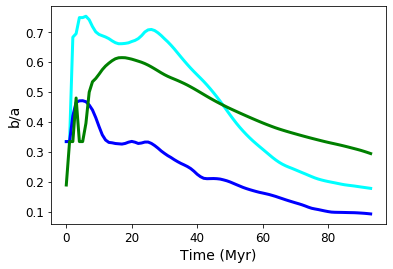

In [14]:
#print(1/area[690])

#viridis = plt.get_cmap("viridis")
#colors = iter(viridis(np.linspace(0,1,total_clusters))) #number of clusters
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
file_name="ellipse_data.pkl"
    #print("\nReading gas data from the file: ",file_name)
with open(datapath+file_name, "rb") as input:
    ratio = pickle.load(input)

print(ratio[690])

fig13=plt.figure()
total_clusters=len(ratio[596])
ax=fig13.add_subplot(111)

for clusters in [1,2,3]:
    print(clusters)
    y_vals=list()
    x_vals=list()
    for i in range(596,690):
        y_vals.append(ratio[i][clusters])
        x_vals.append(i-596)
    ax.plot(x_vals,y_vals,c=colors[clusters-1],label="cluster "+str(clusters),linewidth=3)
    #ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
ax.set_xlabel("Time (Myr)",fontsize=14)
ax.set_ylabel("b/a",fontsize=14)
fig13.savefig("b_by_a_plot.png",bbox_inches='tight')

[0 1 2 3 4 5 6 7 8 9]


[1, 2, 3, nan, 7]


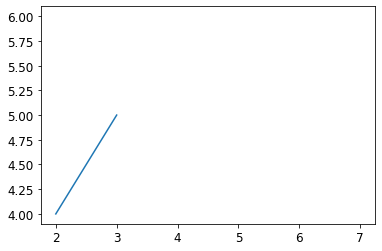

In [31]:
a=[1,2,3,np.nan,7]
b=[np.nan,4,5,6,6]
print(a)

plt.plot(a,b)

# Testing Cluster Properties

In [7]:
data_start=596
data_end=690



fn_clusters_initial="all_clusters_at_snapshot_"+str(data_start)+".pkl" 
fn_clusters_later="all_clusters_at_snapshot_"+str(data_end)+".pkl" 

with open(datapath+fn_clusters_initial, "rb") as input:
    initial_data= pickle.load(input)

with open(datapath+fn_clusters_later, "rb") as input:
    later_data= pickle.load(input)

#print("########################## TEST: This is cluster data from second cluster",cluster_data[1])
print("####################### Total clusters present is",len(initial_data))
print("\n############## Keys to access the data: \n",initial_data[1].keys())



####################### Total clusters present is 17

############## Keys to access the data: 
 dict_keys(['ind_tracked', 'age_tracked', 'x_tracked', 'y_tracked', 'z_tracked', 'vx_tracked', 'vy_tracked', 'vz_tracked', 'mass_tracked', 'xcm', 'ycm', 'zcm', 'delta_rxyz', 'rmax', 'ymax', 'ymin', 'xmax', 'xmin', 'avg_delta_rxyz', 'vR_cyl_tracked', 'vphi_cyl_tracked', 'vz_cyl_tracked'])


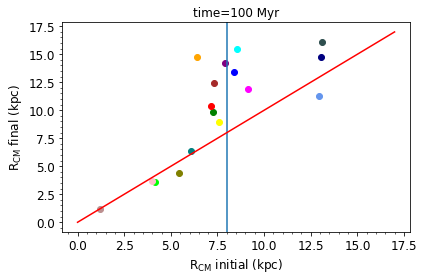

In [18]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
snapshot_initial=596
snapshot_final=690



snapnumber=snapshot_initial

fig11=plt.figure()
cluster_count=0
ax=fig11.add_subplot(111)

for i in range(total_clusters):

    xcm=later_data[cluster_count+1]["xcm"]
    ycm=later_data[cluster_count+1]["ycm"]
    rmax=later_data[cluster_count+1]["rmax"]

    xcm_initial=initial_data[cluster_count+1]["xcm"]
    ycm_initial=initial_data[cluster_count+1]["ycm"]
    #zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]

    xcm_later=later_data[cluster_count+1]["xcm"]
    ycm_later=later_data[cluster_count+1]["ycm"]
    #zcm_later=cluster_data_later[cluster_count+1]["zcm"]

    R_cm_initial=(xcm_initial**2+ycm_initial**2)**(0.5)
    R_cm_later=(xcm_later**2+ycm_later**2)**(0.5)

   
    ax.scatter(R_cm_initial,R_cm_later,c=colors[cluster_count])
    
    cluster_count+=1 

ax.minorticks_on()

ax.set_ylabel(r"R$_{\rm CM}$ final (kpc)",fontsize=12)
ax.set_xlabel(r"R$_{\rm CM}$ initial (kpc)",fontsize=12)  
ax.set_title("time=100 Myr")

ax.axvline(x=8)
#ax.axhline(y=11)
#ax.axhline(y=6.5)


xmin,xmax=ax.get_xlim()
ymin,ymax=ax.get_ylim()

x=min(xmin,ymin)
y=max(xmax,ymax)
ax.plot((0,y),(0,y),c="red")
#ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")

##################
##################
img_name="R_initial_R_final.png"
#fig11.savefig(gif_path+img_name,bbox_inches='tight',dpi=200)
plt.tight_layout()
#plt.close()

# Looking at only one snapshot

/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


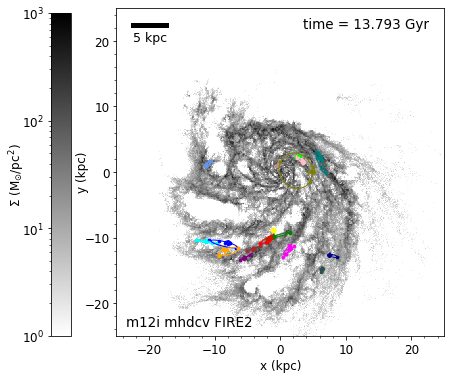

The last image that was Saved is:  690mymodel_ellipse.png


In [2]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
snapshot_initial=596
snapshot_final=690

gif_path="./ellipse_images_gifs/" #creating a path to store the plots only if it does not exist
gas_datapath="./fire2_gas_data_pkl/"
if not os.path.exists(gif_path):
  os.makedirs(gif_path)

#snapnumber=snapshot_initial

area={}

fig11=plt.figure()

snapnumber=snapshot_final


area_snap=list()
fn_clusters_later="all_clusters_at_snapshot_"+str(snapnumber)+".pkl" 
with open(datapath+fn_clusters_later, "rb") as input:
    later_data= pickle.load(input)
#print("Reading from the file: ",fn_clusters_later)
total_clusters=len(later_data)
cluster_count=0
fig11.set_size_inches(7,7)
ax=fig11.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height

for i in range(total_clusters):

    x=later_data[cluster_count+1]["x_tracked"]
    y=later_data[cluster_count+1]["y_tracked"]
    z=later_data[cluster_count+1]["z_tracked"]

    xcm=later_data[cluster_count+1]["xcm"]
    ycm=later_data[cluster_count+1]["ycm"]
    rmax=later_data[cluster_count+1]["rmax"]

    dists=((xcm-x)**2+(ycm-y)**2)**(1/2) #dists is an array that stores distance from cm to each point serially
    dists_max=np.max(dists) #finding the maximum value of distance in the dist array
    dists_min=np.min(dists) #finding the minimum value of distance in the dist array

    max_location=np.where(dists==dists_max) #finding the location in the dists array where the max distance is at to find the point
    min_location=np.where(dists==dists_min) #finding the location of min distance to find the point where the min distance is

    max_point_x=x[max_location] #extracting is the x and y position of the max point Note: it is still an array
    max_point_y=y[max_location]

    min_point_x=x[min_location] #extracting is the x and y position of the min point Note: it is still an array
    min_point_y=y[min_location]

    angle=(max_point_y[0]-min_point_y[0])/(max_point_x[0]-min_point_x[0]) #slope of the line joining max and min points

    #x=x*-1
    #y=y*-1
    #xcm=xcm*-1
    #ycm=ycm*-1

    slope=np.arctan(angle)
    ax.scatter(xcm,ycm,marker="+",c=colors[cluster_count],alpha=0.7)
    s1=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=colors[cluster_count],s=7)
    #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    ax.minorticks_on()
    ax.tick_params(labelsize=12)
    ax.set_xlabel("x (kpc)",fontsize=12,labelpad=3)
    ax.set_ylabel("y (kpc)",fontsize=12,labelpad=-5)
    #ax.set_title("Clusters after ~100 Myrs")
    #ax.set_xlim(-20,20)
    #ax.set_ylim(-20,20)
    xy=zip(x,y)
    xy_array=np.array(tuple(xy))

    ####

    ell = EllipseModel()
    e=ell.estimate(xy_array)
    if(e==True):
        #print("success")
        xc, yc, a, b, theta = ell.params
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
        #print(b,a)
        if (b>a):
            arr=a/b
        elif(b<a):
            arr=b/a
        #print(arr)

    elif(e==False):
        #print("Failed")
        xc=xcm
        yc=ycm
        theta=slope
        a=rmax
        b=rmax/3
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
        #arr=np.nan
        arr=b/a

    area_snap.append(arr)    
    cluster_count+=1 

#ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")

##################
##################
#Loading the gas data
file_name=simtype+"_gas_data"+str(snapnumber)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
  import_gasdata = pickle.load(input)

#v=import_gasdata["v"]
face=import_gasdata["face"]
#xh=import_gasdata["xh"]
#yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 


#colorbar for the background gas density
cmap_gray = matplotlib.cm.get_cmap('binary')
norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
cbar_ax1 = fig11.add_axes([0.04, 0.185, 0.04, 0.64]) # position of gray colorbar (left, bottom, width, height)
cb1 = fig11.colorbar(im, cax=cbar_ax1, ticklocation='left')
cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
#plot a scale bar 5 kpc long
ax.plot([-22.5,-17.5], [22.5,22.5], 'k-', linewidth=5)
label1 = "5 kpc"
ax.text(-22.5, 20, label1, fontsize=12.5)

#label the name of the galaxy on plot 
#label_simname="m12i mhdcv"
#ax.text(10,-23.5,label_simname,fontsize=13.5)
label2="m12i mhdcv "+simtype.upper() 
ax.text(-23.5,-23.5,label2,fontsize=13.5) 

#label the time from the snapshot_times.txt file
label3 = 'time = ' + f'{snaptime:.3f}' + ' Gyr'
ax.text(3.5,22,label3,fontsize=13.5) #display at the top right  
#ax.text(-23.5,-21,label3,fontsize=13.5) #display time on the bottom left above simtype


img_name=str(snapnumber)+"mymodel_ellipse.png"
#fig11.savefig(gif_path+img_name,bbox_inches='tight',dpi=200)
#print("Generated the plot and saved the figure as: ",img_name,end="\r",flush=True)
plt.tight_layout()
plt.show()
    
print("The last image that was Saved is: ",img_name)
